In [27]:
x = [5, 3, -1, 2, 6]
y = [14, 6, -5.5, 3.5, 18]
print(x, y)

[5, 3, -1, 2, 6] [14, 6, -5.5, 3.5, 18]


In [28]:
sum_of_x = 0
sum_of_y = 0
sum_of_xy_product = 0
cumulative_powers_of_x = 0
n = len(x) 

for i in range(n):
    sum_of_x += x[i]
    sum_of_y += y[i]
    sum_of_xy_product += x[i] * y[i]
    cumulative_powers_of_x += x[i] ** 2 

print("n:",n,
    "\n sum_of_x:", sum_of_x,
    "\n sum_of_y:", sum_of_y,
    "\n sum_of_xy_product:", sum_of_xy_product,
    "\n cumulative_powers_of_x:", cumulative_powers_of_x )



n: 5 
 sum_of_x: 15 
 sum_of_y: 36.0 
 sum_of_xy_product: 208.5 
 cumulative_powers_of_x: 75


In [33]:
# y = ax + b
# slope (a):
w1 = (n * sum_of_xy_product - sum_of_x * sum_of_y ) / (n * cumulative_powers_of_x - sum_of_x**2)
print("w1: ", w1)
# intercept (b):
w0 = (sum_of_y - w1 * sum_of_x) / n
print("w2: ", w0)

w1:  3.35
w2:  -2.85


### Illustrating This Experiment for 1000 of points(n=1000):

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets


In [5]:
#Simulation Data:[Appendix1]
n = 1000
x = np.random.normal(3, 5, size=n)
# np.random.normal(0, 3, size=n) is a noise in form of a normal 
# distribution with average of 0 and variance if 3
y = -15 * x + 20 + np.random.normal(0, 3, size=n)

In [6]:
sum_x = np.sum(x)
sum_y = np.sum(y)

w1 = (n * np.dot(x,y) - sum_x * sum_y ) / (n * np.dot(x,x) - sum_x**2)
w0 = ( sum_y - w1 * sum_x ) / n

w1, w0 = round(w1, 3), round(w0, 3)
print(f" y={w1}x + {w0} ")


 y=-14.992x + 19.985 


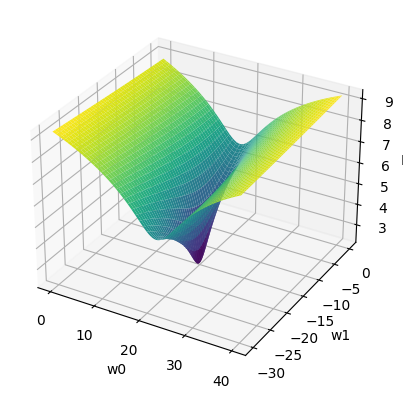

shape of z_axis:(100, 100) := 2D vector with 100 row and 100 columns
shape of w0_values:(100,) := 1D vector with 100 elements
shape of parameter_w0:(100, 100) := 2D vector with 100 row and 100 columns


In [9]:
#mean square error:
"""We used Mean Squared Error (MSE) as 
our loss function because minimizing the
average error and minimizing the total
error will lead to the same optimal
solution. Both approaches will converge
at the same point, making MSE a suitable
choice for our analysis. difference will
be a coefficient of 1/n"""
def MSE_loss(w0, w1, x, y):
    prediction = w0 + w1 * x
    loss = np.sum( (prediction - y)**2 ) / len(y)
    return loss

#generating a grid of w0 and w1 values around w0=20 and b1=-15
"""The np.linspace function generates an array of
 evenly spaced values over a specified range"""
w0_values = np.linspace(0, 40, 100)
w1_values = np.linspace(-30, 0, 100)


#log scale is used only for better visualization:
z_axis = np.zeros ( ( len(w0_values), len(w1_values) ))
for i in range(len(w0_values)):
    for j in range(len(w1_values)):
        z_axis[i,j] = np.log(MSE_loss(w0=w0_values[i], w1=w1_values[j], x=x, y=y))
       

"""3D plot of MSE loss in log-scale:"""
# Create a new figure for 3D plotting
fig = plt.figure()
# Add a 3D subplot to the figure
'''111 := nrows=1,ncols=1, index=1,
111 means you are creating a single subplot in
a 1x1 grid, which is effectively the only subplot
in the figure.'''
axes = fig.add_subplot(111, projection='3d')
# Create a meshgrid for the parameter values[Appendix2]
parameter_w0, parameter_w1 = np.meshgrid(w0_values, w1_values)

axes.plot_surface(parameter_w0, parameter_w1, z_axis, cmap="viridis")

#Axis Labeling:
axes.set_xlabel('w0')
axes.set_ylabel('w1')
axes.set_zlabel('Loss')

plt.show()

print(f"shape of z_axis:{z_axis.shape} := 2D vector with 100 row and 100 columns" )
print(f"shape of w0_values:{w0_values.shape} := 1D vector with 100 elements" )
print(f"shape of parameter_w0:{parameter_w0.shape} := 2D vector with 100 row and 100 columns" )

### Illustrate Linear Regression for D-space vector:

#### Generate Synthetic Data:


In [17]:
def generate_data(n, noise):
    np.random.seed(42)
    X = np.linspace(-10, 10, 50)
    # truth line := y = 3x + 8
    true_slope = 3
    true_intercept = 8
    noise = np.random.normal(size=n) * noise
    y = true_slope * X + true_intercept + noise
    return X, y 

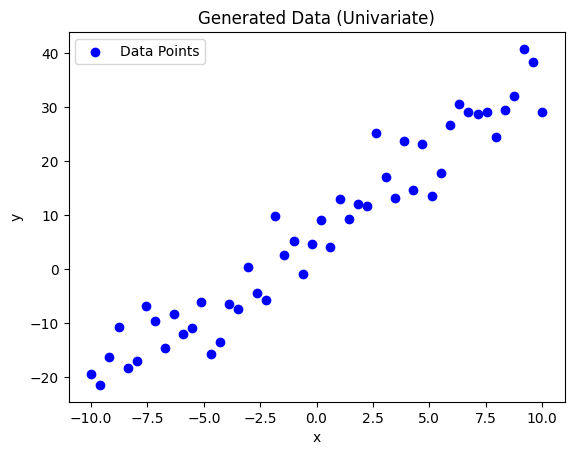

In [22]:
X, y = generate_data(n=50, noise=5)
plt.scatter(X, y, color="blue", label="Data Points")
plt.title("Generated Data (Univariate)")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()


#### Implement the Closed-Form Solution:


In [26]:
from numpy.linalg import inv

In [36]:
X_b = np.c_[np.ones( (len(X), 1) ), X]

In [39]:
print(inv((np.dot(X_b.transpose(), X_b))))

[[2.00000000e-02 8.19213978e-20]
 [8.19213978e-20 5.76470588e-04]]


In [40]:
print(np.dot(X.transpose(), X))

1734.6938775510205


In [41]:
def hypothesis_vector(x, W):
    return w[0] + w[1] * x

def linear_regression_closed_form():
    #(x^T x)^-1 * y^T * X 
    w = np.dot(inv(np.dot(X.transpose(), X)), np.dot(inv(y), X ) ) 
    return w

# # Get parameter vector w
w = linear_regression_closed_form()
print(w)
# y_pred

LinAlgError: 0-dimensional array given. Array must be at least two-dimensional

In [ ]:
"""Appendix 1"""
#works:
x_test = np.random.normal(3, 5, size=4)
y_test = 4 * x_test + 10
print(f"x test: {x_test} \n y test: {y_test}" )

#doesn't work:
x_test_1 = [1, 2, 3, 4]
y_test_1 = -15 * x_test_1 + 20
print(y_test_1)

#Explanation:
# Element-wise Operations: In NumPy, when you perform operations like -15 * x,
# it applies the multiplication to each element of the array x.
# This is different from standard Python lists,
# where you cannot directly multiply a list by a scalar.

x test: [ 3.37834873  0.99949103 -1.25339682 -7.18096658] 
 y test: [ 23.51339493  13.99796411   4.98641272 -18.72386632]


TypeError: can only concatenate list (not "int") to list

test_w0: [3, 5, 7, 9] 
         test_par_w0: [[3 5 7 9]
 [3 5 7 9]
 [3 5 7 9]
 [3 5 7 9]] 
         test_w1: [10, 20, 30, 40] 
         test_par_w1: [[10 10 10 10]
 [20 20 20 20]
 [30 30 30 30]
 [40 40 40 40]]

test_par_w0, test_par_w1: (array([[3, 5, 7, 9],
       [3, 5, 7, 9],
       [3, 5, 7, 9],
       [3, 5, 7, 9]]), array([[10, 10, 10, 10],
       [20, 20, 20, 20],
       [30, 30, 30, 30],
       [40, 40, 40, 40]]))  


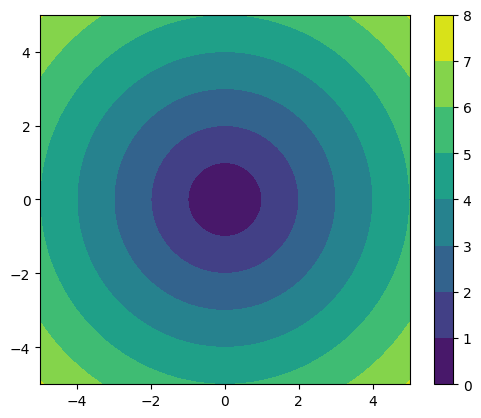

In [ ]:
"""Appendix 2"""

"""
The np.meshgrid function generates coordinate
matrices(grids) from the provided coordinate vectors.
"""

test_w0 = [3, 5, 7, 9]
test_w1 = [10, 20, 30, 40]
test_par_w0, test_par_w1 = np.meshgrid(test_w0, test_w1)

print (f"test_w0: {test_w0} \n \
        test_par_w0: {test_par_w0} \n \
        test_w1: {test_w1} \n \
        test_par_w1: {test_par_w1}\n")

print (f"test_par_w0, test_par_w1: {test_par_w0, test_par_w1}  ")


#(W0[i, j], W1[i, j], Z[i, j])